# AIT Development notebook

## notebook of structure

|#|area name|cell num|description|edit or not|
|---|---|---|---|---|
| 1|flags set|1|setting of launch jupyter or ait flag.|no edit|
| 2|ait-sdk install|1|Use only jupyter launch.<br>find ait-sdk and install.|no edit|
| 3|create requirements and pip install|1|Use only jupyter launch.<br>create requirements.txt.<br>And install by requirements.txt.|should edit|
| 4|import|1|you should write use import modules.<br>but bottom lines do not edit.|should edit|
| 5|create manifest|1|Use only jupyter launch.<br>create ait.manifest.json.|should edit|
| 6|create input|1|Use only jupyter launch.<br>create ait.input.json.|should edit|
| 7|initialize|1|this cell is initialize for ait progress.|no edit|
| 8|functions|N|you defined measures, resources, downloads in ait.manifesit.json. <br>Define any functions to add these.|should edit|
| 9|main|1|Read the data set or model and calls the function defined in `functions-area`.|should edit|
|10|entrypoint|1|Call the main function.|no edit|
|11|license attribute set|1|Use only notebook launch.<br>Setting attribute for license.|should edit|
|12|prepare deploy|1|Use only notebook launch.<br>Convert to python programs and create dag.py.|no edit|

In [1]:
#########################################
# area:flags set
# do not edit
#########################################

# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

In [2]:
#########################################
# area:ait-sdk install
# do not edit
#########################################
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re

    def numericalSort(value):
        numbers = re.compile(r'(\d+)')
        parts = numbers.split(value)
        parts[1::2] = map(int, parts[1::2])
        return parts
    latest_sdk_file_path=sorted(glob('../lib/*.whl'), key=numericalSort)[-1]

    ait_sdk_name = Path(latest_sdk_file_path).name
    
    # copy to develop dir
    import shutil
    current_dir = %pwd
    shutil.copyfile(f'../lib/{ait_sdk_name}', f'{current_dir}/{ait_sdk_name}')

    # install ait-sdk
    !pip install --upgrade pip
    !pip install --force-reinstall ./$ait_sdk_name

     |████████████████████████████████| 1.5 MB 5.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1
Processing ./ait_sdk-0.1.7-py3-none-any.whl
     |████████████████████████████████| 14.9 MB 14.7 MB/s eta 0:00:01   |████▊                           | 2.2 MB 3.2 MB/s eta 0:00:04     |███████                         | 3.3 MB 3.2 MB/s eta 0:00:04     |██████████████████████████████  | 13.9 MB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 172 kB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 465 kB 9.1 MB/s eta 0:00:01
  Using cached nbconvert-6.0.7-py3-none-any.whl (552 kB)
     |████████████████████████████████| 95 kB 4.6 MB/s  eta 0:00:01
     |████████████████████████████████| 25.9 MB 10.4 MB/s eta 0:00:01   |███▉                            | 3.1 MB 7.1 MB/s eta 0:00:04     |███████▋                        | 6.1 MB 7.1 MB/s eta 0:00:03     |█████

In [3]:
#########################################
# area:create requirements and pip install
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()
    requirements_generator.add_package('pandas')
    requirements_generator.add_package('seaborn')
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -r $requirements_path 

Processing ./ait_sdk-0.1.7-py3-none-any.whl
     |████████████████████████████████| 9.5 MB 36 kB/s  eta 0:00:01     |█████████████████████████       | 7.4 MB 5.5 MB/s eta 0:00:01     |██████████████████████████▊     | 7.9 MB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 10.9 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 10.2 MB/s eta 0:00:01
ait-sdk is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


In [4]:
#########################################
# area:import
# should edit
#########################################

# import if you need modules cell
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from pathlib import Path
from os import makedirs, path

# must use modules
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

In [5]:
#########################################
# area:create manifest
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_find_ca_error')
    manifest_genenerator.set_ait_description('Evaluating quantity of unsound CA combination cases in dataset')
    manifest_genenerator.set_ait_author('AIST')
    manifest_genenerator.set_ait_email('')
    manifest_genenerator.set_ait_version('0.1')
    manifest_genenerator.set_ait_quality('https://airc.aist.go.jp/aiqm/quality/internal/Coverage_for_distinguished_problem_cases')
    manifest_genenerator.set_ait_reference('')
    manifest_genenerator.add_ait_inventories(name='ca_data', 
                                             type_='dataset', 
                                             description='''Classification of different attributes related to autonomous driving scenarios. 
                                             Need header.
                                             Include header for Unsound_CA_combinations.
                                             ''', 
                                             format_=['csv'], 
                                             schema='CSV')
    manifest_genenerator.add_ait_inventories(name='Unsound_CA_combinations', 
                                             type_='attribute set', 
                                             description='Combinations of different attribute values that are not possible in real life', 
                                             format_=['csv'], 
                                             schema='User given data')
    manifest_genenerator.add_ait_parameters(name='PCA', 
                                            type_='str', 
                                            description='Primary conditional attribute', 
                                            default_val='Road type')
    manifest_genenerator.add_ait_parameters(name='PCV', 
                                            type_='str', 
                                            description='Primary conditional value', 
                                            default_val='Highway')
    manifest_genenerator.add_ait_parameters(name='SCA', 
                                            type_='str', 
                                            description='Secondary conditional attribute', 
                                            default_val='Signal')
    manifest_genenerator.add_ait_parameters(name='SCV', 
                                            type_='str', 
                                            description='Secondary conditional Value', 
                                            default_val='Green')
    manifest_genenerator.add_ait_parameters(name='Combination_index', 
                                            type_='int', 
                                            description='Index of unsound CA combination case', 
                                            default_val='5',
                                            min_value='1')
    manifest_genenerator.add_ait_measures(name='count', 
                                          type_='int', 
                                          description='Quantity of unsound case', 
                                          structure='single', 
                                          min='0')
    manifest_genenerator.add_ait_measures(name='percentage', 
                                          type_='float', 
                                          description='Percentage of unsound case in dataset', 
                                          structure='single', 
                                          min='0', 
                                          max='100')
    manifest_genenerator.add_ait_resources(name='CountPlot', 
                                           type_='picture', 
                                           description='Plot of number of data in each unsound case')
    manifest_genenerator.add_ait_resources(name='PercentagePlot', 
                                           type_='picture', 
                                           description='Plot of percentage of unsound cases in data')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AITLog')
    manifest_path = manifest_genenerator.write()

In [6]:
#########################################
# area:create input
# should edit
#########################################
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='ca_data',
                                        value='ca_data/ca_labels_2036.csv')
    input_generator.add_ait_inventories(name='Unsound_CA_combinations',
                                        value='Unsound_CA_combinations/unsound_CA_combination_cases.csv')
    input_generator.set_ait_params(name='PCA',
                                   value='Road type')
    input_generator.set_ait_params(name='PCV',
                                   value='Highway')
    input_generator.set_ait_params(name='SCA',
                                   value='Signal')
    input_generator.set_ait_params(name='SCV',
                                   value='Green')
    input_generator.set_ait_params(name='Combination_index',
                                   value='5')
    input_generator.write()

In [7]:
#########################################
# area:initialize
# do not edit
#########################################

logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

In [8]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@measures(ait_output, 'count', 'percentage')
def calc_count_percentage(combination_cases_data):
    return combination_cases_data['count'].sum(), combination_cases_data['percentage'].sum()

@log(logger)
def calc_count_all(ca_data, combination_cases_data):
    total_data = len(ca_data)
    combination_cases_data['count']=0
    combination_cases_data['percentage']=0
    for i,_row in combination_cases_data.iterrows():
        temp_df=ca_data[ca_data[_row.PCA]==_row.PCV]
        temp_df=temp_df[temp_df[_row.SCA]==_row.SCV]
        combination_cases_data.loc[i,'count']=len(temp_df)
        combination_cases_data.loc[i,'percentage']=(len(temp_df)/len(ca_data))*100
    return combination_cases_data

def count_for_index(ca_data, combination_cases_data, index):
    count_data = calc_count_all(ca_data, combination_cases_data)
    return count_data.loc[int(index)-1,'count']

def percentage_for_index(ca_data, combination_cases_data, index):
    count_data = calc_count_all(ca_data, combination_cases_data)
    return count_data.loc[int(index)-1,'percentage']

In [9]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@resources(ait_output, path_helper, 'CountPlot', 'error_ca_count_plot.png')
def save_count_plot(combination_cases_data_result, file_path: str=None) -> None:
    plt.figure(dpi=100, figsize=(8,6))
    combination_cases_data_result['count'].plot(kind = 'barh')
    plt.xlabel('Count')
    plt.ylabel('Index number')
    plt.title('Number of data in each unsound CA combination')
    plt.savefig(file_path)
    
    
@log(logger)
@resources(ait_output, path_helper, 'PercentagePlot', 'error_ca_percentage_plot.png')
def save_percentage_plot(combination_cases_data_result, file_path: str=None) -> None:
    plt.figure(dpi=100, figsize=(8,6))
    combination_cases_data_result['percentage'].plot(kind = 'bar')
    plt.xlabel('Index number')
    plt.ylabel('Percentage value(%) in 100%')
    plt.title('(%)Percentage of data in each unsound CA combination for total data')
    plt.savefig(file_path)
    

In [10]:
#########################################
# area:functions
# should edit
#########################################

@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> None:
    shutil.move(get_log_path(), file_path)

In [11]:
#########################################
# area:main
# should edit
#########################################

@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:

    # インベントリを読み込み
    ca_data = pd.read_csv(ait_input.get_inventory_path('ca_data'))
    print('Number of total data samples: ', len(ca_data))
    combination_cases_data = pd.read_csv(ait_input.get_inventory_path('Unsound_CA_combinations'))
    combination_cases_data_result = calc_count_all(ca_data, combination_cases_data)
    
    calc_count_percentage(combination_cases_data_result)
    
    print('Unsound cases and their corresponding quanitites:\n',combination_cases_data_result)
    count = count_for_index(ca_data, combination_cases_data, ait_input.get_method_param_value('Combination_index'))
    save_count_plot(combination_cases_data_result)
    save_percentage_plot(combination_cases_data_result)
    move_log()

Number of total data samples:  2036
Unsound cases and their corresponding quanitites:
          PCA      PCV             SCA           SCV  count  percentage
0    Weather    Snowy  Road condition           Dry      0    0.000000
1    Weather    Rainy  Road condition           Dry      2    0.098232
2  Road type  Highway          Signal         Green     21    1.031434
3  Road type  Highway          Signal           Red      6    0.294695
4  Road type  Highway          Signal        Yellow      1    0.049116
5  Road type  Highway  Zebra crossing           Yes      7    0.343811
6  Road type  Highway      Pedestrian       On road      2    0.098232
7  Road type  Highway      Pedestrian  On  sidewalk      0    0.000000


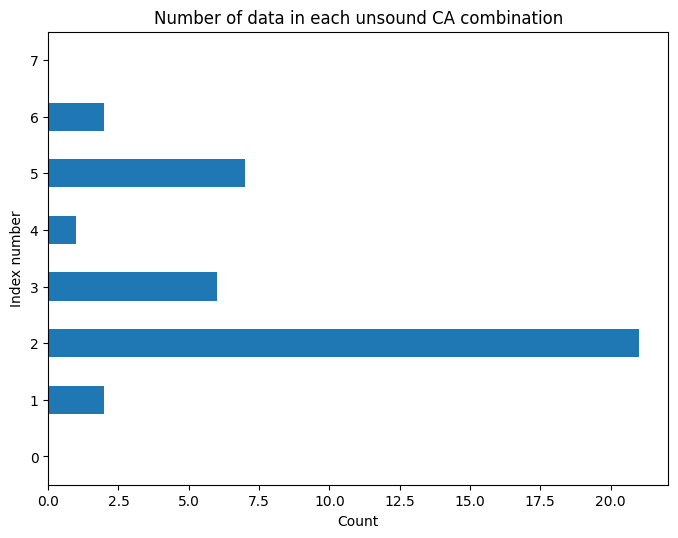

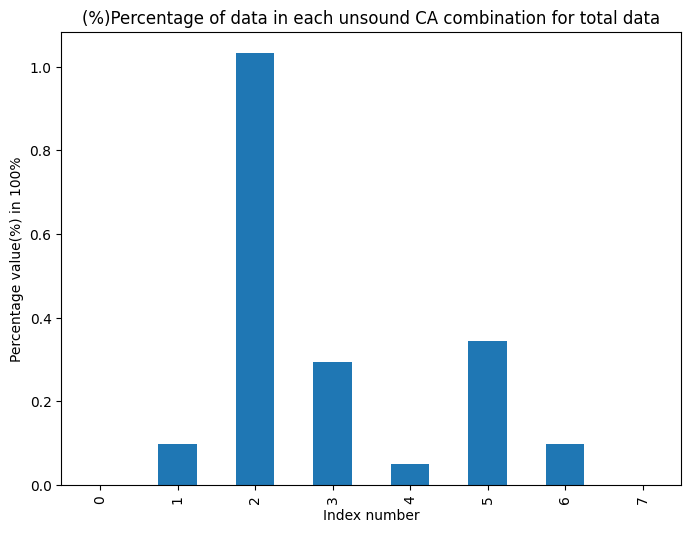

In [12]:
#########################################
# area:entory point
# do not edit
#########################################
if __name__ == '__main__':
    main()

In [13]:
#########################################
# area:license attribute set
# should edit
#########################################
ait_owner='AIST'
ait_creation_year='2020'

In [14]:
#########################################
# area:prepare deproy
# do not edit
#########################################

if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_manifest, ait_sdk_name, current_dir, requirements_path, is_remote_deploy=True)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
